                                           HW7: PCA for Digit Recognition
                                                                     -Sainath,Anand,Bharath,Keerthana

In [158]:
#Table of contents:
#1. PCA on digits for visualization
#2. PCA on digits for compression
#3. PCA on digits improve classification
#4. K-means clustering on digits

In [159]:
import numpy as np
import pylab as py
%matplotlib inline

In [160]:
# digit recognition setup...

from sklearn.datasets import load_digits
digits = load_digits()

X, y = digits.data, digits.target
print("data shape: %r, target shape: %r" % (X.shape, y.shape))
print("classes: %r" % list(np.unique(y))) # To define unique classes.

n_samples, n_features = X.shape
print("n_samples=%d" % n_samples)
print("n_features=%d" % n_features)

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_samples=1797
n_features=64


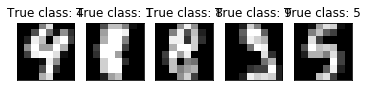

In [161]:
def plot_gallery(data, labels, shape, interpolation='nearest'):
    for i in range(data.shape[0]):
        py.subplot(1, data.shape[0], (i + 1))
        py.imshow(data[i].reshape(shape), interpolation=interpolation)
        py.title(labels[i])
        py.xticks(()), py.yticks(())
        py.gray()

subsample = np.random.permutation(X.shape[0])[:5]
images = X[subsample]
labels = ['True class: %d' % l for l in y[subsample]]
plot_gallery(images, labels, shape=(8, 8))

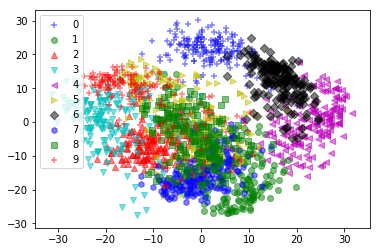

In [162]:
# 1. PCA on digits for visualization

from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(n_components=5)
X_pca = pca.fit_transform(X)
X_pca.shape

from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    py.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
        c=c, marker=m, label=i, alpha=0.5)

_ = py.legend(loc='best')

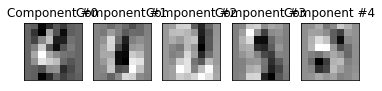

In [163]:
labels = ['Component #%d' % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8, 8))

In [164]:
#Question 1.  Percent variance explained for each PCA component
print("The percentage variance for each pca component is: ")
print(pca.explained_variance_ratio_)

The percentage variance for each pca component is: 
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415]


compressed images of first 8 digits
with this many PCA components: [1, 2, 3, 5, 10, 20, 40, 64]


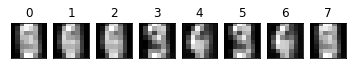

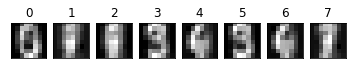

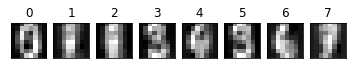

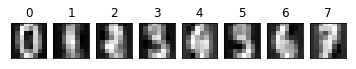

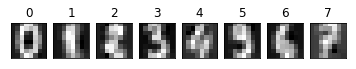

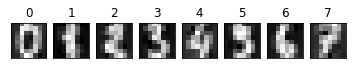

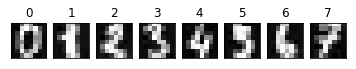

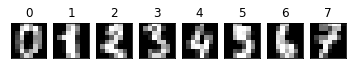

In [165]:
# 2. PCA on digits for compression
n = 8 # number of digits for demonstration
dims = [1,2,3,5,10,20,40,64]
print('compressed images of first',n,'digits')
print('with this many PCA components:',dims)
for d in dims:  # dimensionality for compressed signal
    pca = RandomizedPCA(n_components=d)
    pca.fit_transform(X)
    reduced_X = pca.transform(X[0:n]) # the reduced dimensionality
    recovered_X = pca.inverse_transform(reduced_X)
    py.figure()
    plot_gallery(recovered_X, y[0:n], shape=(8, 8))
    

Question2: Since there is lot of variation between second  and third components compared to 1st component and also digit in the component 2  have much darker contrast in the center when compared to other components. Hence second component is used for dicrimination.

In [166]:
#Question 3 : Tabulating  image compression and cumulative variance for all components
import pandas as pd
n = 8 # number of digits for demonstration
columns=["No of components","Percentage of image compression","Percentage of variance"]
df= pd.DataFrame(columns = columns)
for d in range(1,64):# dimensionality for compressed signal
    compressed_dims = 1 - (d/64)
    pca = RandomizedPCA(n_components=d)
    pca.fit_transform(X)
    df = df.append({"No of components" : d ,"Percentage of image compression": compressed_dims,"Percentage of variance": sum(pca.explained_variance_ratio_)},ignore_index=True)
print(df)

    No of components  Percentage of image compression  Percentage of variance
0                1.0                         0.984375                0.148906
1                2.0                         0.968750                0.285094
2                3.0                         0.953125                0.403040
3                4.0                         0.937500                0.487139
4                5.0                         0.921875                0.544964
5                6.0                         0.906250                0.594133
6                7.0                         0.890625                0.637292
7                8.0                         0.875000                0.673903
8                9.0                         0.859375                0.707438
9               10.0                         0.843750                0.738225
10              11.0                         0.828125                0.761949
11              12.0                         0.812500           

In [167]:
#Note: The above table shows that first fifteen components comprises of 83% of variance

In [168]:
# 3. PCA on digits improve classification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))
print("test data shape: %r, test target shape: %r"
      % (X_test.shape, y_test.shape))

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X_train, y_train)
train_score = model.score(X_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(X_test, y_test)
print('test score:',test_score)

train data shape: (898, 64), train target shape: (898,)
test data shape: (899, 64), test target shape: (899,)
training score (overfitting!): 0.8752783964365256
test score: 0.8342602892102335


In [169]:
# but now using PCA features instead of pixels directly!

pca = RandomizedPCA(n_components=10)
pca.fit(X_train)

tX_train = pca.transform(X_train)
tX_test = pca.transform(X_test)

model = GaussianNB().fit(tX_train, y_train)
train_score = model.score(tX_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(tX_test, y_test)
print('test score:',test_score)

from sklearn import metrics
y_test_pred = model.predict(tX_test)
expected = y_test
predicted = model.predict(tX_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

training score (overfitting!): 0.9164810690423163
test score: 0.9154616240266963
Confusion matrix:
[[89  0  0  0  0  0  0  0  0  0]
 [ 0 85  2  0  0  0  0  0  2  1]
 [ 0  7 83  1  0  0  0  1  0  0]
 [ 0  0  2 79  0  4  0  2  2  4]
 [ 0  1  0  0 71  0  0  4  0  0]
 [ 0  0  0  0  1 98  0  0  0  9]
 [ 0  2  0  0  0  0 84  0  2  1]
 [ 0  1  0  0  0  0  0 77  0  0]
 [ 0 13  0  1  0  1  0  1 72  4]
 [ 0  1  0  1  0  3  0  2  0 85]]


Text(0, 0.5, 'digit recognition accuracy')

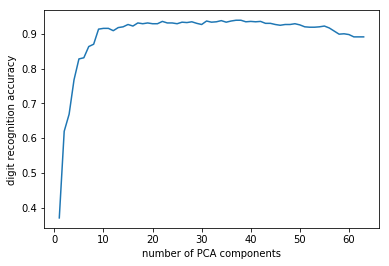

In [170]:
# let's plot accuracy vs number of components!

accuracy = []
n_comp = range(1,64)
for i in n_comp:
    pca = RandomizedPCA(n_components=i)
    pca.fit(X_train)

    tX_train = pca.transform(X_train)
    tX_test = pca.transform(X_test)

    model = GaussianNB().fit(tX_train, y_train)
    test_score = model.score(tX_test, y_test)
    accuracy.append(test_score)

py.plot(n_comp, accuracy)
py.xlabel('number of PCA components')
py.ylabel('digit recognition accuracy')

Question4 : Using K nearest Neighbour classfier for image classfication and plotting accuracy

In [171]:
# K Nearest Neighbors on image classification:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

print("train data shape: %r, train target shape: %r"
      % (X_train.shape, y_train.shape))
print("test data shape: %r, test target shape: %r"
      % (X_test.shape, y_test.shape))

from sklearn.neighbors import KNeighborsClassifier
Neighbor = KNeighborsClassifier(n_neighbors = 1)
model = Neighbor.fit(X_train, y_train)
train_score = model.score(X_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(X_test, y_test)
print('test score:',test_score)


train data shape: (898, 64), train target shape: (898,)
test data shape: (899, 64), test target shape: (899,)
training score (overfitting!): 1.0
test score: 0.982202447163515


In [172]:
# but now using PCA features instead of pixels directly (KNN)!

pca = RandomizedPCA(n_components=10)
pca.fit(X_train)

tX_train = pca.transform(X_train)
tX_test = pca.transform(X_test)

model = Neighbor.fit(tX_train, y_train)
train_score = model.score(tX_train, y_train) 
print('training score (overfitting!):',train_score)

test_score = model.score(tX_test, y_test)
print('test score:',test_score)

from sklearn import metrics
y_test_pred = model.predict(tX_test)
expected = y_test
predicted = model.predict(tX_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

training score (overfitting!): 1.0
test score: 0.9733036707452726
Confusion matrix:
[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  87   0   0   0   1   0   0   1   1]
 [  0   0  91   0   0   0   0   1   0   0]
 [  0   0   0  91   0   0   0   0   1   1]
 [  0   0   0   0  76   0   0   0   0   0]
 [  0   0   0   2   1 101   1   0   1   2]
 [  0   0   0   0   0   0  89   0   0   0]
 [  0   0   0   0   0   0   0  78   0   0]
 [  0   2   0   1   0   0   0   2  84   3]
 [  0   0   0   0   0   3   0   0   0  89]]


Text(0, 0.5, 'Digit recognition accuracy')

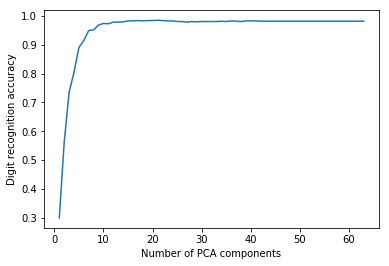

In [173]:
# let's plot accuracy vs number of components (KNN)!

accuracy = []
n_comp = range(1,64)
for i in n_comp:
    pca = RandomizedPCA(n_components=i)
    pca.fit(X_train)

    tX_train = pca.transform(X_train)
    tX_test = pca.transform(X_test)

    model = Neighbor.fit(tX_train, y_train)
    test_score = model.score(tX_test, y_test)
    accuracy.append(test_score)

py.plot(n_comp, accuracy)
py.xlabel('Number of PCA components')
py.ylabel('Digit recognition accuracy')

In [174]:
# 4. K-means clustering on digits

# identify 10 clusters (which should correspond to digits)
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10)
k_means.fit(digits.data) 

print('true  :',digits.target[::50])
print('kmeans:',k_means.labels_[::50])

metrics.adjusted_rand_score(digits.target, k_means.labels_)

true  : [0 2 4 0 1 4 7 7 4 4 8 6 2 4 2 6 4 5 4 3 1 1 9 8 7 1 3 3 2 5 1 5 2 5 5 3]
kmeans: [5 4 8 5 9 8 6 6 8 8 0 1 7 8 4 1 8 3 8 2 7 4 3 2 6 4 2 2 0 0 9 3 7 3 3 2]


0.6657766892467535

In [175]:
dbscan = cluster.DBSCAN(eps = 24, min_samples = 20)
dbscan.fit(digits.data) 

print('true  :',digits.target[::50])
print('dbscan:',dbscan.labels_[::50])

metrics.adjusted_rand_score(digits.target, dbscan.labels_)

true  : [0 2 4 0 1 4 7 7 4 4 8 6 2 4 2 6 4 5 4 3 1 1 9 8 7 1 3 3 2 5 1 5 2 5 5 3]
dbscan: [ 0 -1  4  0  3  4  5  5  4  4 -1  2  8  4 -1  2  4  7  4  1 -1  6 -1 -1
  5  6  1  1 -1  7 -1  7  8  7  7  1]


0.5100021253245306